# Import modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
# import sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# sklearn models
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Import PKL Data

In [3]:
path_clean = '../data/modified/trees_clean.pkl'
trees_clean = pd.read_pickle(path_clean)

In [4]:
trees_clean

,SOUS_CATEGORIE_DESC,CODE_PARENT_DESC,ADR_SECTEUR,GENRE_BOTA,ESPECE,STADEDEDEVELOPPEMENT,ANNEEDEPLANTATION,COLLECTIVITE,longitude,latitude
0,Arbre d'espaces ouverts,Tr quartiers talu architecture,6,Pinus,NaN,Arbre adulte,1975.0,Ville de Grenoble,5.733052,45.160874
1,Arbre d'espaces ouverts,Désserte des alisiers mail,6,Platanus,acerifolia,Arbre adulte,1975.0,Ville de Grenoble,5.739665,45.163463
2,Arbre d'espaces ouverts,Désserte des alisiers mail,6,Platanus,acerifolia,Arbre adulte,1975.0,Ville de Grenoble,5.739376,45.163737
3,Arbre d'espaces ouverts,La piste pel de l'aire de jeux,6,Carpinus,betulus,Arbre adulte,1975.0,Ville de Grenoble,5.732758,45.165827
4,Arbre de voirie,R Salengro sép Libé Schweitz,3,Cercis,siliquastrum,Arbre adulte,2006.0,Grenoble Alpes Métropole,5.710181,45.175196
...,...,...,...,...,...,...,...,...,...,...
31590,Arbre d'espaces ouverts,Cité Moyrand R Condé,5,Pyrus,calleryana,NaN,2020.0,Ville de Grenoble,5.743831,45.178852
31591,Arbre d'espaces ouverts,Cité Moyrand R Condé,5,Pyrus,calleryana,NaN,2020.0,Ville de Grenoble,5.743933,45.178801
31592,Arbre d'espaces ouverts,Cité Moyrand R Condé,5,Pyrus,calleryana,NaN,2020.0,Ville de Grenoble,5.743839,45.178747
31608,Arbre de voirie,R M Gontard angle M Deprez,2,Prunus,serrulata,Arbre adulte,1995.0,Grenoble Alpes Métropole,5.724211,45.192098


In [5]:
trees_clean.columns

Index(['SOUS_CATEGORIE_DESC', 'CODE_PARENT_DESC', 'ADR_SECTEUR', 'GENRE_BOTA',
       'ESPECE', 'STADEDEDEVELOPPEMENT', 'ANNEEDEPLANTATION', 'COLLECTIVITE',
       'longitude', 'latitude'],
      dtype='object')

In [6]:
trees_clean['ESPECE'] = trees_clean['ESPECE'].map(str).replace('nan',' ')
trees_clean['GENRE_BOTA'] = trees_clean['GENRE_BOTA'].map(str).replace('nan',' ')

In [7]:
trees_clean['BIO'] = trees_clean['GENRE_BOTA'] + " " + trees_clean['ESPECE']
trees_clean = trees_clean.drop(['GENRE_BOTA','ESPECE'],axis=1)

# Visualisation after cleaning

In [45]:
trees_clean.BIO.value_counts()

Platanus acerifolia    3754
Acer pseudoplatanus    1294
Pinus nigra            1222
Carpinus betulus       1144
Acer platanoides       1001
                       ... 
Pinus tomentosa           1
Pinus verrucosa           1
Cladastris kentukea       1
Cedrela sinense           1
Eucalyptus gunii          1
Name: BIO, Length: 393, dtype: int64

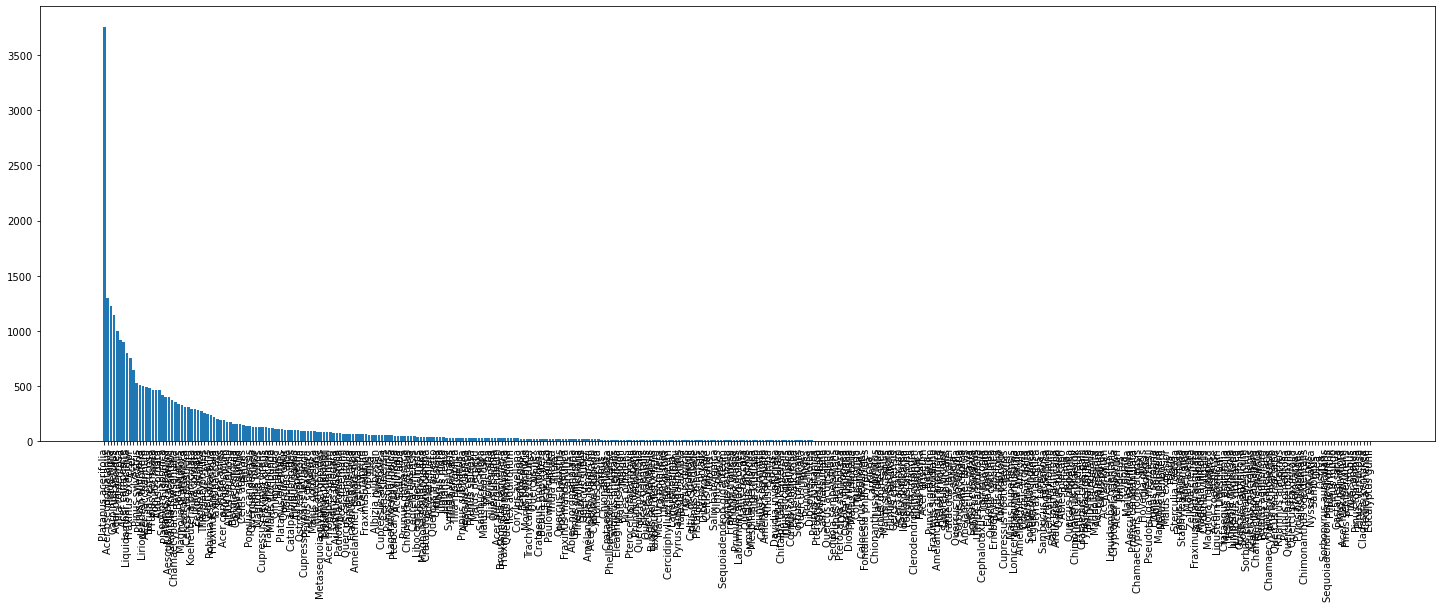

In [50]:
fig,ax = plt.subplots(figsize=(25,8))
x = trees_clean.BIO.value_counts().index
y = trees_clean.BIO.value_counts().values
ax.bar(x,y)
ax.tick_params(axis='x', labelrotation= 90);

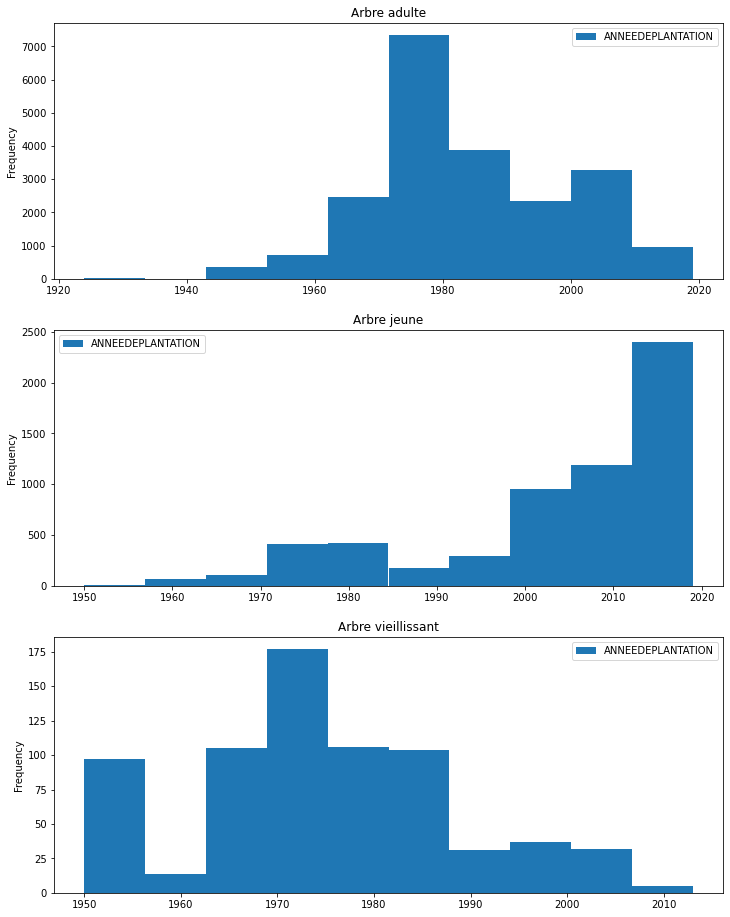

In [8]:
trees_clean.plot(kind='hist',column='ANNEEDEPLANTATION',by='STADEDEDEVELOPPEMENT',subplots=True,figsize=(12,16));

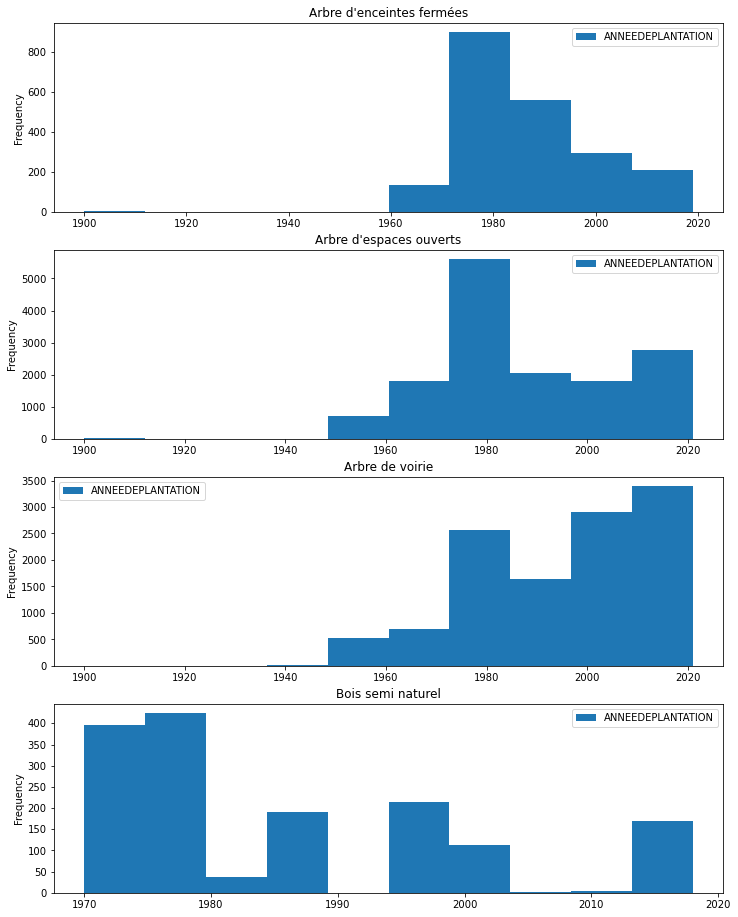

In [9]:
trees_clean.plot(kind='hist',column='ANNEEDEPLANTATION',by='SOUS_CATEGORIE_DESC',subplots=True,figsize=(12,16));

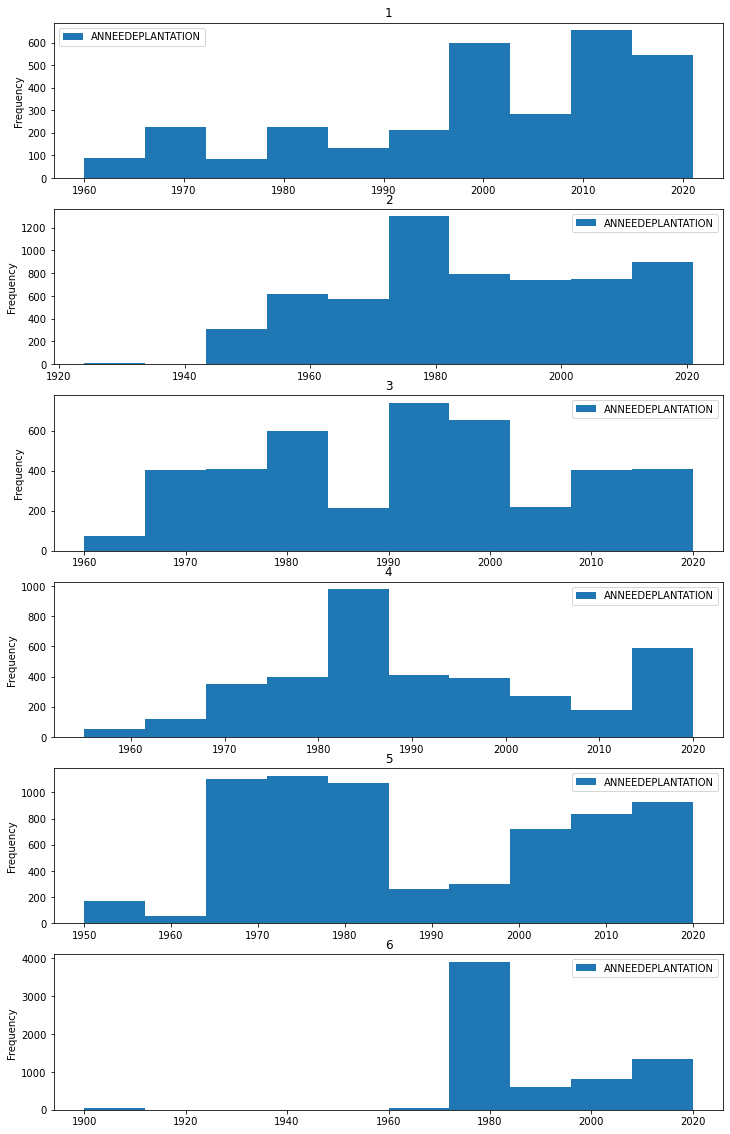

In [10]:
trees_clean.plot(kind='hist',column='ANNEEDEPLANTATION',by='ADR_SECTEUR',subplots=True,figsize=(12,20));

# Generation of train_test sets

In [11]:
dic = {'SOUS_CATEGORIE_DESC':'category',
 'CODE_PARENT_DESC':'category',
 'ADR_SECTEUR':'category',
 'STADEDEDEVELOPPEMENT':'category',
 'COLLECTIVITE':'category',
 'longitude':'float64',
 'latitude':'float64',
 'BIO':'category'
}
trees_clean = trees_clean.astype(dic)

In [53]:
predictors['CODE_PARENT_DESC'].nunique()

1458

In [12]:
annee = trees_clean.ANNEEDEPLANTATION
predictors = trees_clean.drop('ANNEEDEPLANTATION',axis=1)

In [13]:
predictors_train,predictors_test,annee_train,annee_test = train_test_split(predictors,annee,random_state=2708)

# ML Pipeline

In [14]:
predictors_train.dtypes

SOUS_CATEGORIE_DESC     category
CODE_PARENT_DESC        category
ADR_SECTEUR             category
STADEDEDEVELOPPEMENT    category
COLLECTIVITE            category
longitude                float64
latitude                 float64
BIO                     category
dtype: object

In [15]:
categorical_transformer = OneHotEncoder(handle_unknown = 'ignore')
numerical_transformer = StandardScaler()

transformer = ColumnTransformer(
[("num_trans", numerical_transformer, make_column_selector(dtype_exclude="category")),
("cat_trans", categorical_transformer, make_column_selector(dtype_include='category'))])

In [16]:
model_1 = RandomForestRegressor(n_estimators=10)
param_1 = {'model':[model_1]} 
model_2 = DecisionTreeRegressor()
param_2 = {'model':[model_2]} 
model_3 = SVR()
param_3 = {'model':[model_3]} 

In [17]:
pipe = Pipeline(steps=[("transformer", transformer),  
                       ("model", model_1)])
params_list = [param_1,param_2,param_3]

In [18]:
grid_search = GridSearchCV(pipe,params_list,cv=10,scoring='neg_mean_squared_error')

In [19]:
# ML tests

In [20]:
grid_search.fit(predictors_train,annee_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('num_trans',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f44abbd3d30>),
                                                                        ('cat_trans',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f44abbd39d0>)])),
                                       ('model',
                                        RandomForestRegressor(n_estimators=10))]),
             param_grid=[{'model': [RandomForestRegressor(n_estimators=10)]},
                         {'model': [DecisionTreeRegressor()]},
                         {'model': [SVC()]}],
             scoring='neg_mean_squared_error')

In [21]:
grid_results = pd.DataFrame(grid_search.cv_results_)
grid_results.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,4.604693,0.072078,0.013243,0.000725,RandomForestRegressor(n_estimators=10),{'model': RandomForestRegressor(n_estimators=10)},-27.941022,-38.263352,-30.922322,-27.647245,-34.199017,-27.008581,-28.562362,-39.294813,-35.729132,-35.378202,-32.494605,4.398485,1
1,0.564901,0.016424,0.008906,0.000354,DecisionTreeRegressor(),{'model': DecisionTreeRegressor()},-33.302643,-49.698678,-34.983260,-43.630234,-44.800353,-38.843103,-37.949317,-60.683561,-45.299691,-50.260467,-43.945131,7.819114,2
2,12.820554,0.093521,3.603470,0.067009,SVC(),{'model': SVC()},-42.845374,-64.588987,-44.082379,-51.386073,-53.343323,-53.018951,-54.101366,-63.925077,-60.119877,-52.290436,-53.970184,6.942779,3


In [22]:
best_pipe = grid_search.best_estimator_

In [23]:
annee_predict = best_pipe.predict(predictors_test)
mse = mean_squared_error(annee_test,annee_predict)
print('MSE_test',mse)
print('R²:',best_pipe.score(predictors_test,annee_test))

MSE_test 30.666018506278917
R²: 0.9050294748338978


# ML hyperparameter tuning

In [28]:
model_1 = RandomForestRegressor()
param_1 = {'model__n_estimators':[3,5,10,15],
           'model':[model_1]} 
model_2 = DecisionTreeRegressor()
param_2 = {'model__min_samples_leaf':[1,5,10],
           'model':[model_2]} 
model_3 = SVR()
param_3 = {'model__C':[1,10,100],
           'model':[model_3]} 

In [29]:
pipe = Pipeline(steps=[("transformer", transformer),  
                       ("model", model_1)])
params_list = [param_1,param_2,param_3]
grid_search = GridSearchCV(pipe,params_list,cv=10,scoring='neg_mean_squared_error')

In [30]:
grid_search.fit(predictors_train,annee_train)
grid_results = pd.DataFrame(grid_search.cv_results_)
grid_results.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__n_estimators,param_model__min_samples_leaf,param_model__C,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
3,7.004051,0.120955,0.015672,0.000855,RandomForestRegressor(n_estimators=15),15,NaN,NaN,{'model': RandomForestRegressor(n_estimators=1...,-26.271250,...,-27.736062,-31.890297,-27.092381,-26.465981,-42.380859,-35.451713,-34.057415,-31.570321,5.005005,1
2,4.627008,0.062914,0.013535,0.000935,RandomForestRegressor(n_estimators=15),10,NaN,NaN,{'model': RandomForestRegressor(n_estimators=1...,-28.016819,...,-28.287858,-34.424015,-29.233407,-27.523208,-44.928171,-33.128502,-36.538026,-32.719716,5.335899,2
9,11.814157,0.137486,3.054616,0.068828,SVC(),NaN,NaN,100,"{'model': SVC(), 'model__C': 100}",-27.237885,...,-30.489643,-34.181137,-28.489202,-32.861613,-42.812693,-36.414720,-40.419568,-34.260426,4.924002,3
8,11.955621,0.102832,3.059548,0.070022,SVC(),NaN,NaN,10,"{'model': SVC(), 'model__C': 10}",-27.830837,...,-31.246364,-34.562362,-30.256941,-32.304539,-43.117673,-37.576465,-41.179815,-34.746619,4.806943,4
1,2.408419,0.130173,0.011862,0.001742,RandomForestRegressor(n_estimators=15),5,NaN,NaN,{'model': RandomForestRegressor(n_estimators=1...,-27.714555,...,-34.018599,-37.435910,-27.825033,-29.483032,-45.821155,-36.519277,-39.609061,-34.814208,5.604760,5
0,1.403814,0.022568,0.010117,0.000457,RandomForestRegressor(n_estimators=15),3,NaN,NaN,{'model': RandomForestRegressor(n_estimators=1...,-29.790504,...,-33.588561,-34.982371,-32.624749,-32.185299,-48.676412,-41.588806,-41.884678,-36.696157,5.579914,6
4,0.580091,0.020142,0.008982,0.000226,DecisionTreeRegressor(),NaN,1,NaN,"{'model': DecisionTreeRegressor(), 'model__min...",-33.901762,...,-45.480388,-45.351256,-39.444249,-36.345086,-61.504628,-46.130013,-52.899956,-44.131681,8.430566,7
5,0.416263,0.010007,0.008880,0.000373,DecisionTreeRegressor(),NaN,5,NaN,"{'model': DecisionTreeRegressor(), 'model__min...",-47.702188,...,-46.608513,-50.883302,-46.321729,-45.397344,-64.919437,-51.222333,-54.179069,-51.804265,6.307648,8
7,12.856780,0.088683,3.629523,0.095084,SVC(),NaN,NaN,1,"{'model': SVC(), 'model__C': 1}",-42.845374,...,-51.386073,-53.343323,-53.018951,-54.101366,-63.925077,-60.119877,-52.290436,-53.970184,6.942779,9
6,0.342070,0.005383,0.008647,0.000120,DecisionTreeRegressor(),NaN,10,NaN,"{'model': DecisionTreeRegressor(), 'model__min...",-53.892982,...,-54.694204,-64.448979,-54.115543,-61.857728,-65.891589,-62.368048,-65.865963,-61.596956,6.131379,10
